In [12]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
data = pd.read_csv('data/descriptor/all_descriptors.csv')
data_positive = pd.read_csv('data/descriptor/positive_descriptors.csv')
data_negative = pd.read_csv('data/descriptor/negative_descriptors.csv')

feature_names = pd.read_csv('feature_names.csv')['Value']

# Set feature names as column names of data dataset
data.columns = feature_names
data_positive.columns = feature_names
data_negative.columns = feature_names
print('Shape of positive:', data_positive.shape)
print('Shape of negative:', data_negative.shape)
print('Shape of all:', data.shape)


Shape of positive: (945, 583)
Shape of negative: (931, 583)
Shape of all: (1876, 583)


In [21]:
zero_percentage_all = (data == 0).mean() * 100
zero_percentage_positive = (data_positive == 0).mean() * 100
zero_percentage_negative = (data_negative == 0).mean() * 100


zero_perc_check_df = pd.DataFrame({
    'Zero_Percentage_all': zero_percentage_all,
    'Zero_Percentage_positive': zero_percentage_positive,
    'Zero_Percentage_negative': zero_percentage_negative
})
zero_perc_check_df.reset_index(inplace=True)
zero_perc_check_df.rename(columns={'index': 'Value'}, inplace=True)
zero_perc_check_df

,Value,Zero_Percentage_all,Zero_Percentage_positive,Zero_Percentage_negative
0,AUTOCORR2D_1,0.000000,0.000000,0.000000
1,AUTOCORR2D_2,0.000000,0.000000,0.000000
2,AUTOCORR2D_3,0.000000,0.000000,0.000000
3,AUTOCORR2D_4,0.000000,0.000000,0.000000
4,AUTOCORR2D_5,0.053305,0.000000,0.107411
...,...,...,...,...
578,fr_thiazole,98.773987,99.682540,97.851772
579,fr_thiocyan,100.000000,100.000000,100.000000
580,fr_thiophene,94.402985,98.518519,90.225564
581,fr_unbrch_alkane,63.272921,39.047619,87.862513


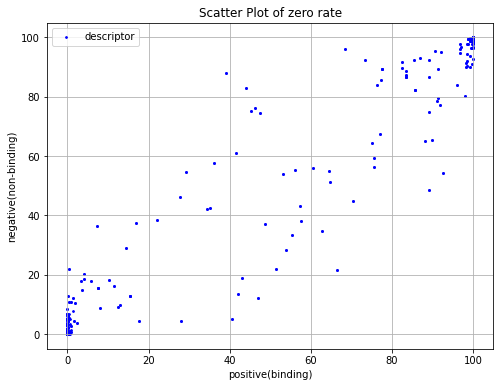

In [34]:
x = zero_perc_check_df['Zero_Percentage_positive']
y = zero_perc_check_df['Zero_Percentage_negative']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s = 3,c='blue', marker='o', label='descriptor')
plt.xlabel('positive(binding)')
plt.ylabel('negative(non-binding)')
plt.title('Scatter Plot of zero rate')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
res = zero_perc_check_df[(zero_perc_check_df['Zero_Percentage_positive'] > 0.8) & (zero_perc_check_df['Zero_Percentage_negative'] > 0.8)]['Value']
print(len(res), res)


285 193         MinEStateIndex
195      MinAbsEStateIndex
201    NumRadicalElectrons
237              PEOE_VSA1
238             PEOE_VSA10
              ...         
578            fr_thiazole
579            fr_thiocyan
580           fr_thiophene
581       fr_unbrch_alkane
582                fr_urea
Name: Value, Length: 285, dtype: object


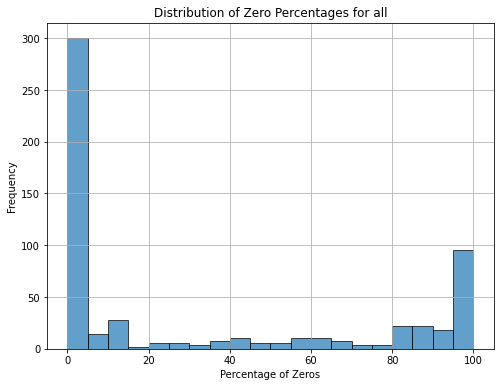

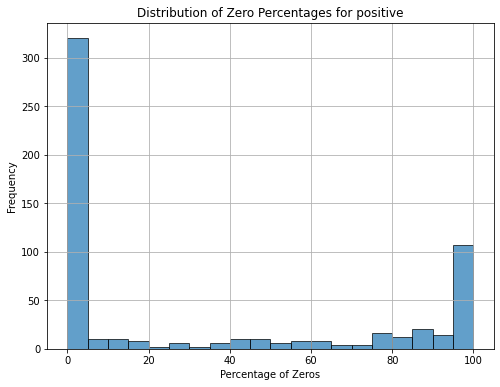

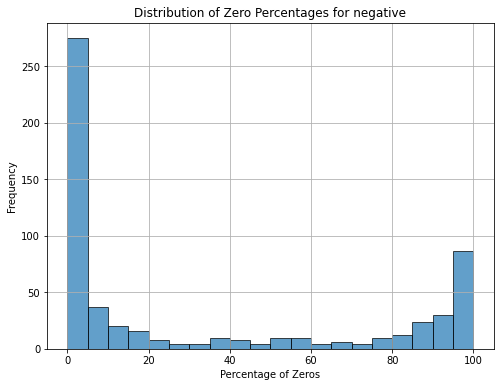

In [58]:
def zero_perc_distribution(zero_percentage, group):
    plt.figure(figsize=(8, 6))
    plt.hist(zero_percentage, bins=20, edgecolor='k', alpha=0.7)
    plt.xlabel('Percentage of Zeros')
    plt.ylabel('Frequency')
    plt.title('Distribution of Zero Percentages for {}'.format(group))
    plt.grid(True)
    plt.show()
    plt.close()

zero_perc_distribution(zero_percentage_all, 'all')
zero_perc_distribution(zero_percentage_positive, 'positive')
zero_perc_distribution(zero_percentage_negative, 'negative')

<AxesSubplot:>

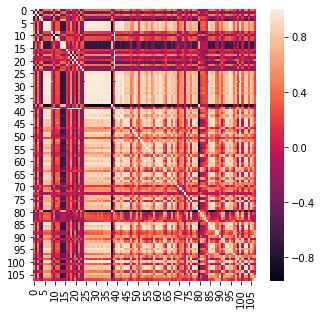

In [89]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.datasets import make_blobs   
# data, _ = make_blobs(n_samples=300, centers=3, n_features=3, random_state=42)
data = pd.read_csv('data/descriptor/all_descriptors_cut.csv')
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled)
# data_scaled = data

corr = data_scaled.corr()
plt.figure(figsize=(5, 5))

sns.heatmap(corr)


<AxesSubplot:>

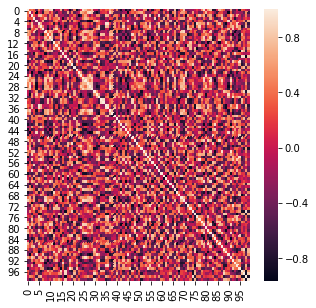

In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs   
data, _ = make_blobs(n_samples=2000, centers=5, n_features=100)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

data_scaled = pd.DataFrame(data_scaled)
# data_scaled = data

corr = data_scaled.corr()
plt.figure(figsize=(5, 5))

sns.heatmap(corr)
